In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
file_path = "/content/drive/MyDrive/heart.7z"

In [3]:
!apt-get install -y p7zip-full

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [18]:
!7z x "/content/drive/MyDrive/heart.7z" -o/content/extracted_data


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/                                 1 file, 5052812 bytes (4935 KiB)

Extracting archive: /content/drive/MyDrive/poker.7z
--
Path = /content/drive/MyDrive/poker.7z
Type = 7z
Physical Size = 5052812
Headers Size = 250
Method = LZMA2:24
Solid = +
Blocks = 1

  0%     41% 1 - poker/poker-hand-testing.data                                       82% 1 - poker/poker-hand-testing.data                                      Everything is Ok

Folders: 1
Files: 3
Size:       25158067
Compressed: 5052812


In [19]:
import os
os.listdir('/content/extracted_data')

['heart', 'poker']

In [33]:
!ls -al /content/extracted_data/heart

total 704
drwx------ 3 root root   4096 Jun  6  2022 .
drwx------ 4 root root   4096 Nov 20 10:45 ..
-rw-r--r-- 1 root root    587 Jun  6  2022 ask-detrano
-rw-r--r-- 1 root root   6737 Jun  6  2022 bak
-rw-r--r-- 1 root root  60669 Jun  6  2022 cleveland.data
-rw-r--r-- 1 root root  23941 Jun  6  2022 cleve.mod
drwx------ 2 root root   4096 Jun  6  2022 costs
-rw-r--r-- 1 root root  10060 Jun  6  2022 heart-disease.names
-rw-r--r-- 1 root root  62192 Jun  6  2022 hungarian.data
-rw-r--r-- 1 root root    644 Jun  6  2022 Index
-rw-r--r-- 1 root root  39892 Jun  6  2022 long-beach-va.data
-rw-r--r-- 1 root root 389771 Jun  6  2022 new.data
-rw-r--r-- 1 root root  18551 Aug 17  2022 processed.cleveland.data
-rw-r--r-- 1 root root  10353 Aug 17  2022 processed.hungarian.data
-rw-r--r-- 1 root root   4199 Aug 17  2022 processed.switzerland.data
-rw-r--r-- 1 root root   6827 Aug 17  2022 processed.va.data
-rw-r--r-- 1 root root  11148 Aug 17  2022 reprocessed.hungarian.data
-rw-r--r-- 1 roo

In [36]:
!head /content/extracted_data/heart/heart-disease.names

Publication Request: 
   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   This file describes the contents of the heart-disease directory.

   This directory contains 4 databases concerning heart disease diagnosis.
   All attributes are numeric-valued.  The data was collected from the
   four following locations:

     1. Cleveland Clinic Foundation (cleveland.data)
     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
!head /content/extracted_data/heart/new.data

1 15943882 63 1 -9 -9 -9
-27 1 145 1 233 -9 50 20
1 0 1 2 2 3 1981 0
0 0 0 0 1 10.5 6 13
150 60 190 90 145 85 0 0
2.3 3 -9 -9 0 -9 -9 -9
-9 -9 -9 6 -9 -9 -9 2
16 1981 0 1 1 1 -9 1
-9 1 -9 1 1 1 1 1
1 1 -9 -9 0 -9 -9 -9


In [41]:
def read_csv(country):
  return pd.read_csv("/content/extracted_data/heart/" + country + ".data", na_values='?')

In [65]:
cleveland = read_csv("processed.cleveland")
cleveland

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
switzerland = read_csv("processed.switzerland")
switzerland

In [67]:
def print_data_info(df):
  print("Liczba wierszy: ", len(df))
  print("Kształt ramki danych (wierszy, kolumn): ", df.shape)
  print("Kolumny:")
  print(df.columns)

In [68]:
print_data_info(cleveland)

Liczba wierszy:  303
Kształt ramki danych (wierszy, kolumn):  (303, 14)
Kolumny:
Index(['age', ' sex', ' cp', ' trestbps', ' chol', ' fbs', ' restecg',
       ' thalach', ' exang', ' oldpeak', ' slope', ' ca', ' thal', ' num'],
      dtype='object')


In [70]:
def remove_blank_spaces_from_columns(df):
  df.columns = df.columns.str.strip()
  print(df.columns)

In [71]:
remove_blank_spaces_from_columns(cleveland)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [95]:
cleveland.dropna(inplace=True)
print(f"Shape of cleveland DataFrame after dropping rows with missing values: {cleveland.shape}")

Shape of cleveland DataFrame after dropping rows with missing values: (297, 14)


In [105]:
def show_missing_values(df):
  print(df.isnull().sum() )

In [108]:
show_missing_values(cleveland)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [75]:
cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [76]:
cleveland.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [77]:
# Dystrybucja etykiet poszczególnych klas
print(cleveland["num"].value_counts())

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


In [78]:
def print_unique_values(df):
  print("Unikalne wartości w poszczególnych kolumnach")
  print(f"Kolumny: {df.columns.values}")
  print(f"Unikalne:")
  for column in df.columns:
      unq = df[column].unique()
      print(f"{column}: {unq}")

In [142]:
cleveland['num'] = cleveland['num'].apply(lambda x: x if x == 0 else 1)

In [143]:
print_unique_values(cleveland)

Unikalne wartości w poszczególnych kolumnach
Kolumny: ['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'num']
Unikalne:
age: [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
sex: [1. 0.]
cp: [1. 4. 3. 2.]
trestbps: [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
chol: [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274

In [144]:
corr_matrix = cleveland.corr()
print(corr_matrix["num"].sort_values(ascending=False))


num         1.000000
thal        0.526640
ca          0.463189
oldpeak     0.424052
exang       0.421355
cp          0.408945
slope       0.333049
sex         0.278467
age         0.227075
restecg     0.166343
trestbps    0.153490
chol        0.080285
fbs         0.003167
thalach    -0.423817
Name: num, dtype: float64


In [145]:
def plot_heatmap(corr_matrix):
  plt.figure(figsize=(12, 10))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title('Correlation Matrix Heart Disease Data')
  plt.show()

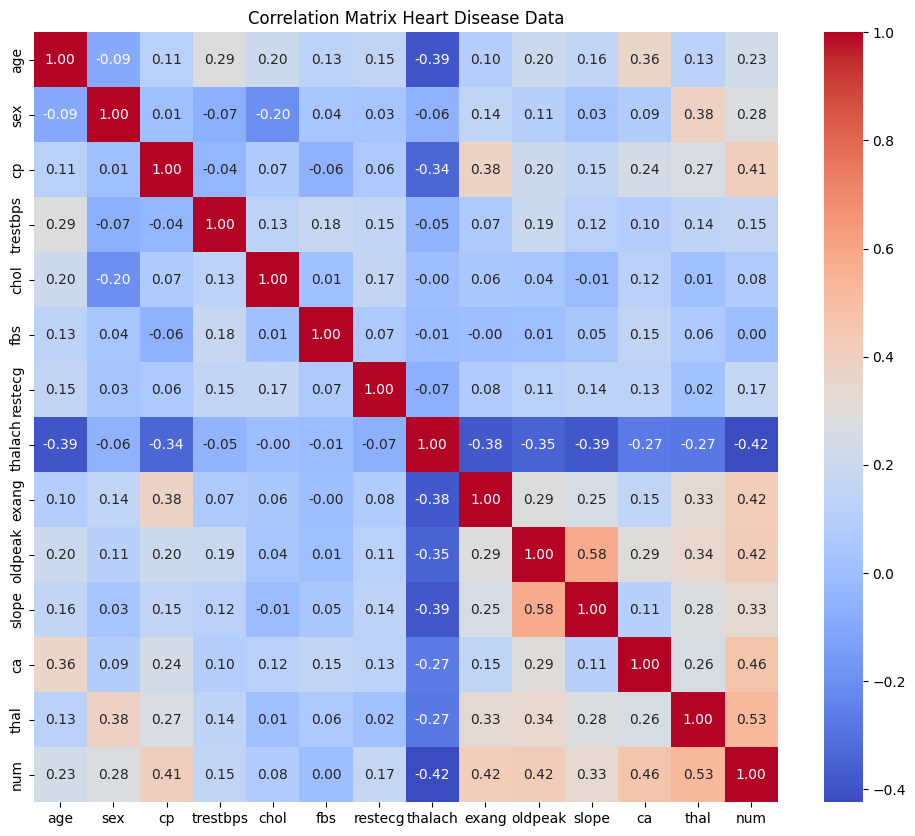

In [146]:
plot_heatmap(corr_matrix)

In [147]:
# Etykiety - unikalne wartości
np.sort(cleveland["num"].unique() )

array([0, 1])

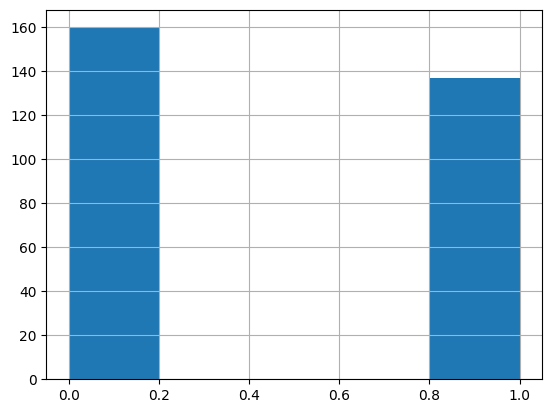

In [148]:
cleveland["num"].hist(bins=5);

In [149]:
print(cleveland.duplicated().sum() ) # brak zduplikowanych wierszy

0


In [150]:
data = cleveland.drop(columns=['num'])
target = cleveland[['num']]
FEATURES = data.columns.values
TARGET = target.columns.values

display(FEATURES)
display(TARGET)

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

array(['num'], dtype=object)

In [151]:
from sklearn.model_selection import train_test_split

X = data
y = target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

X = cleveland.drop(columns=['num'])
y = cleveland['num']

numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

def make_pipeline(model):
    return Pipeline(steps=[
        ("preprocess", clone(preprocessor)),
        ("model", model)
    ])
clf_logreg = make_pipeline(LogisticRegression(max_iter=1000))

clf_rf = make_pipeline(RandomForestClassifier(n_estimators=200, random_state=42))

clf_svm = make_pipeline(SVC(probability=True, kernel="rbf", C=1.0))

clf_dummy = make_pipeline(DummyClassifier(strategy="most_frequent"))


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

clf_logreg.fit(X_train, y_train)
clf_rf.fit(X_train,y_train)
clf_svm.fit(X_train,y_train)

print("Pipeline fitted successfully!")


Pipeline fitted successfully!


In [153]:
import sklearn
print("Etapy przetwarzania potoku preprocessing")
sklearn.set_config(display="diagram")
preprocessor

Etapy przetwarzania potoku preprocessing


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'trestbps', 'chol', 'thalach',
                                  'oldpeak']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                  'slope', 'ca', 'thal'])])

In [154]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

grid_pipe = Pipeline(steps=[
    ("preprocess", clone(preprocessor)),
    ("model", LogisticRegression(max_iter=1000))
])

param_grid = [
    {   # Logistic Regression
        "model": [LogisticRegression(max_iter=1000)],
        "model__C": [0.01, 0.1, 1, 10],
        "model__penalty": ["l2"],
        "model__solver": ["lbfgs"]
    },
    {   # Random Forest
        "model": [RandomForestClassifier(random_state=42)],
        "model__n_estimators": [100, 200, 300],
        "model__max_depth": [None, 5, 10],
        "model__min_samples_split": [2, 5]
    },
    {   # SVM
        "model": [SVC(probability=True)],
        "model__C": [0.1, 1, 10],
        "model__gamma": ["scale", "auto"],
        "model__kernel": ["rbf"]
    }
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=grid_pipe,
    param_grid=param_grid,
    cv=cv,
    scoring="roc_auc_ovr",
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Best CV roc_auc_ovr:", grid.best_score_)
print("Best params:", grid.best_params_)
print("Best estimator:", grid.best_estimator_)

best_model = grid.best_estimator_
test_acc = accuracy_score(y_test, best_model.predict(X_test))
print("Test accuracy of best model:", test_acc)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best CV roc_auc_ovr: 0.9027898767898768
Best params: {'model': RandomForestClassifier(random_state=42), 'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best estimator: Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
            

In [155]:
sklearn.set_config(display="text")
print(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'trestbps', 'chol', 'thalach',
                                  'oldpeak']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                  'slope', 'ca', 'thal'])])


In [160]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

for name, model in [("LogReg", clf_logreg),
                    ("RandomForest", clf_rf),
                    ("SVM", clf_svm)]:
    y_pred = model.predict(X_test)

    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)

    roc = roc_auc_score(y_test, y_pred_proba[:, 1], average='macro')
    f1 = f1_score(y_test, y_pred, average="macro")
    prec = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")
    print(f"{name} accuracy: {acc:.3f}")
    print(f"{name} roc: {roc:.3f}")
    print(f"{name} f1: {f1:.3f}")
    print(f"{name} precision: {prec:.3f}")
    print(f"{name} recall: {rec:.3f}")

LogReg accuracy: 0.817
LogReg roc: 0.941
LogReg f1: 0.812
LogReg precision: 0.827
LogReg recall: 0.810
RandomForest accuracy: 0.833
RandomForest roc: 0.934
RandomForest f1: 0.832
RandomForest precision: 0.835
RandomForest recall: 0.830
SVM accuracy: 0.850
SVM roc: 0.952
SVM f1: 0.848
SVM precision: 0.854
SVM recall: 0.846


In [157]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

models = {
    "BestOutOf3": best_model,
    "Dummy": clf_dummy,
    "LogReg": clf_logreg,
    "RandomForest": clf_rf,
    "SVM": clf_svm
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(
        model,
        X, y,
        cv=cv,
        scoring="roc_auc_ovr"
    )
    print(f"{name}: {scores.mean():.3f} ± {scores.std():.3f}")


BestOutOf3: 0.901 ± 0.045
Dummy: 0.500 ± 0.000
LogReg: 0.908 ± 0.044
RandomForest: 0.902 ± 0.048
SVM: 0.898 ± 0.049


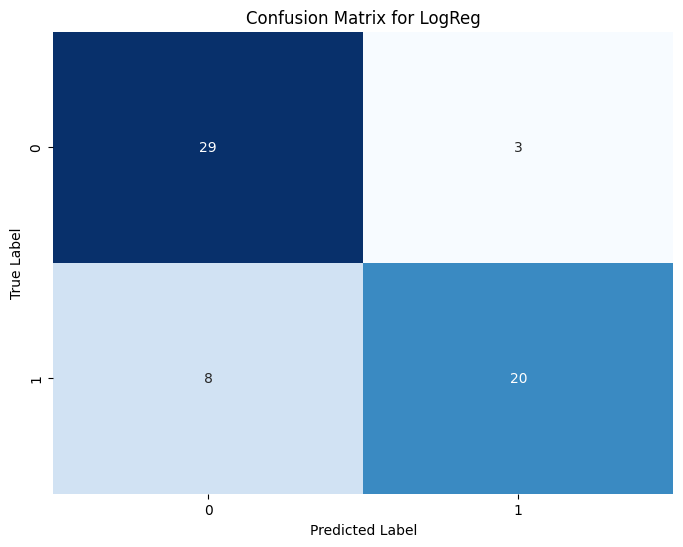

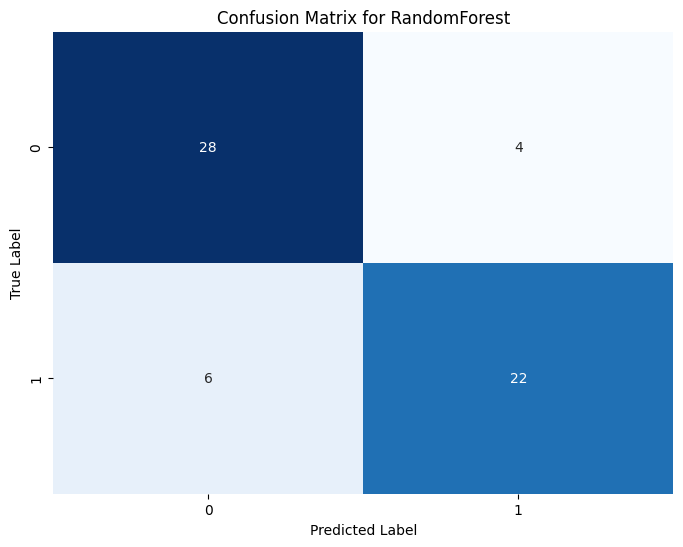

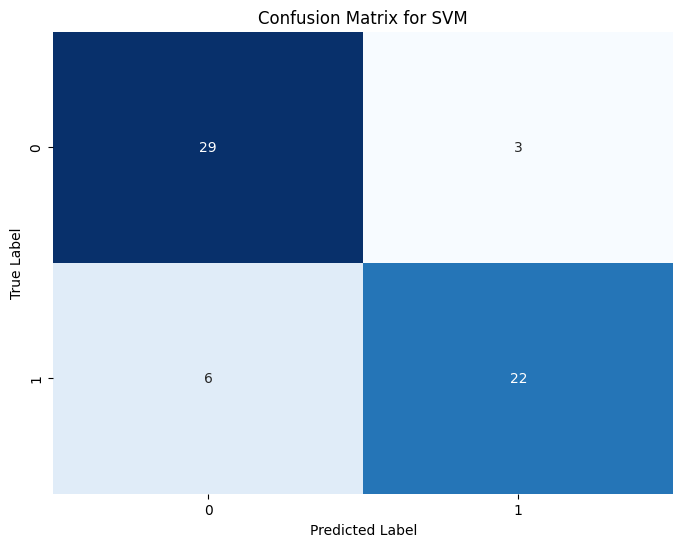

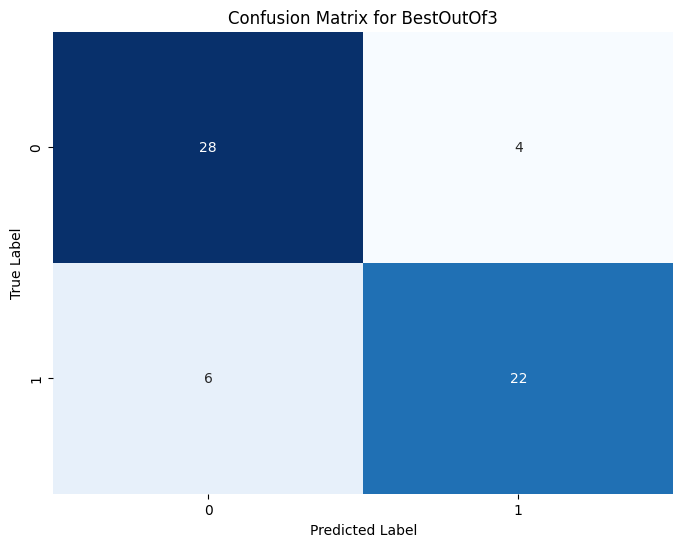

In [158]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

for name, model in [("LogReg", clf_logreg),
                    ("RandomForest", clf_rf),
                    ("SVM", clf_svm),
                    ("BestOutOf3", best_model),]:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()